In [31]:
import os
import cv2
import sys
import math
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
sys.path.insert(1, '../datasets/')
import create_dataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [32]:
import importlib
importlib.reload(create_dataset)

ModuleNotFoundError: No module named 'datasets.dataset_filter'

In [20]:
create_dataset.process_day_data("20180613", "dataset_v2", [], "train", 0)

TypeError: process_day_data() takes 4 positional arguments but 5 were given

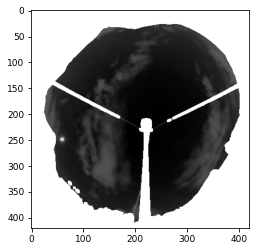

In [33]:
irccam_raw = create_dataset.get_irccam_bt_data("20180624", 360)
irccam_img = create_dataset.process_irccam_img(irccam_raw)
plt.imshow(irccam_img, cmap="gray")

In [25]:
print(irccam_img.max())

65535


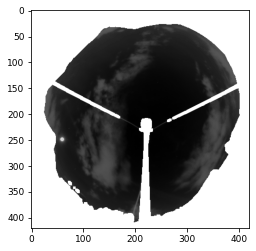

In [34]:
img = irccam_img
img = img - np.nanmin(img)
img = img*(255.0 / np.nanmax(img))
img = np.array(img.round())
plt.imshow(img, cmap="gray")

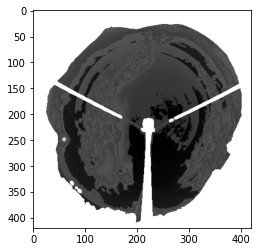

In [106]:
def pixelmod(myimage):
    centre = (200,220)
    for rowpix in range(myimage.shape[0]):
        for pixel in range(myimage.shape[1]):
              xdis=rowpix-centre[0]
              ydis=pixel-centre[1]
              dis=math.sqrt(xdis**2+ydis**2)
              if(dis<40):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>1):
                    myimage[rowpix][pixel]+=25
              elif(dis>=40 and dis<60):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>2):
                    myimage[rowpix][pixel]+=25
              elif(dis>=60 and dis<80):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>3):
                    myimage[rowpix][pixel]+=25
              elif(dis>=80 and dis<100):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>5):
                    myimage[rowpix][pixel]+=25
              elif(dis>=100 and dis<120):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>10):
                    myimage[rowpix][pixel]+=25
              elif(dis>=120 and dis<140):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>20):
                    myimage[rowpix][pixel]+=25
              elif(dis>=140 and dis<160):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>29):
                    myimage[rowpix][pixel]+=25
              elif(dis>=160 and dis<180):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>=29):
                    myimage[rowpix][pixel]+=25
              elif(dis>=180 and dis<200):
                if(myimage[rowpix][pixel]<60 and myimage[rowpix][pixel]>=29):
                    myimage[rowpix][pixel]+=20
    return myimag
pixelimage=img
pixel_image = pixelmod(pixelimage)
plt.imshow(pixel_image, cmap="gray")

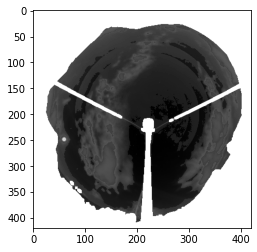

In [103]:
plt.imshow(img, cmap="gray")

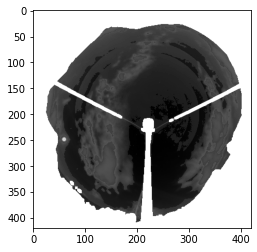

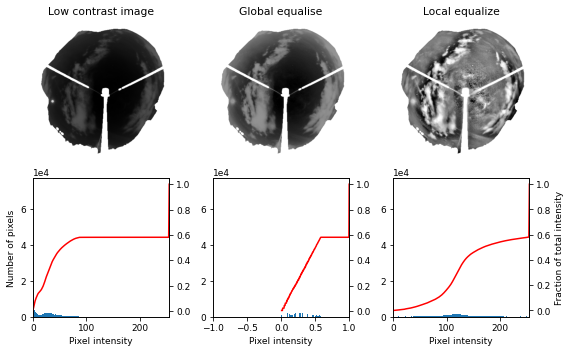

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank

matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_as_ubyte(irccam_img)

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
selem = disk(30)
img_eq = rank.equalize(img, selem=selem)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

In [5]:
pip list

Package               Version
--------------------- ---------
argon2-cffi           20.1.0
async-generator       1.10
attrs                 20.2.0
backcall              0.2.0
bleach                3.2.1
Note: you may need to restart the kernel to use updated packages.
certifi               2020.6.20
cffi                  1.14.3
chardet               3.0.4
colorama              0.4.4
cycler                0.10.0
dataclasses           0.7
datasets              1.1.2
decorator             4.4.2
defusedxml            0.6.0
dill                  0.3.2
entrypoints           0.3
filelock              3.0.12
future                0.18.2
h5py                  2.10.0
idna                  2.10
imageio               2.9.0
importlib-metadata    2.0.0
ipykernel             5.3.4
ipython               7.16.1
ipython-genutils      0.2.0
ipywidgets            7.5.1
jedi                  0.17.2
Jinja2                2.11.2
jsonschema            3.2.0
jupyter               1.0.0
jupyter-client        6.